# Projet 3 

### Mission

Vous travaillez en tant que Data Scientist pour la ville de Seattle. Pour atteindre son objectif de ville neutre en émissions de carbone en 2050, votre équipe s’intéresse de près à la consommation et aux émissions des bâtiments non destinés à l’habitation.


### Le Dataset 

Des relevés minutieux ont été effectués par les agents de la ville en 2016. Voici les données et leur source. Ces relevés sont coûteux à obtenir, et à partir de ceux déjà réalisés, vous voulez tenter de prédire les émissions de CO2 et la consommation totale d’énergie de bâtiments non destinés à l’habitation pour lesquels elles n’ont pas encore été mesurées.

### Objectif 
Le Project Lead Douglas vous convie par message à une réunion de kick-off :

 

Comme tu le sais, ce genre de projet est mené en général par ta collègue Data Scientist Léa. Sauf qu’elle va partir en congé maternité à partir de la semaine prochaine. Ce projet a une très haute visibilité en ce moment auprès de la mairie de Seattle et nous ne pouvons pas attendre son retour pour commencer à travailler dessus. 

 

Afin de t’aider, je me suis coordonné avec Léa pour qu’elle te facilite le travail en te préparant un notebook avec un template de la démarche à suivre et des conseils pour éviter certains pièges. Dans l’ensemble, j’attends de toi :

une courte analyse exploratoire pour faire ressortir des insights clés sur les différents bâtiments ;
des tests des différents modèles supervisés visant à prédire la consommation en énergie des bâtiments ;
la détermination des facteurs principaux impactant le plus le modèle que tu auras sélectionné.


# Analyse Exploratoire

### Import des modules

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyse Exploratoire

In [144]:
building_consumption = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [145]:
copy_building_consumption = building_consumption.copy(deep = True)

In [146]:
# On regarde comment un batiment est défini dans ce jeu de données
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [147]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Quelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

#### Valeurs manquantes et constantes

In [148]:
# On met en avant les valeurs manquantes
building_consumption.isna().sum().sort_values(ascending=False).head(10)

Comments                           3376
Outlier                            3344
YearsENERGYSTARCertified           3257
ThirdLargestPropertyUseType        2780
ThirdLargestPropertyUseTypeGFA     2780
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697
ENERGYSTARScore                     843
LargestPropertyUseTypeGFA            20
LargestPropertyUseType               20
dtype: int64

On peut voir que pour plusieurs colonnes la majorité des valeurs sont manquantes. Cependant, il va falloir faire attention aux colonnes que l'on supprime car pour certaines c'est logique qu'il manque des informations (ex : outliers)

In [149]:
#On regarde les colonnes constantes ou quasi-constantes
building_consumption.nunique().sort_values(ascending=True).head(10)

Comments                0
DataYear                1
State                   1
City                    1
DefaultData             2
Outlier                 2
ComplianceStatus        4
CouncilDistrictCode     7
BuildingType            8
NumberofBuildings      17
dtype: int64

On peut voir qu'il y a de nombreuses colonnes avec très peu de valeurs uniques. Là encore, attendons un peu avant de supprimer quoi que ce soit

#### Analyse des types de bâtiments

In [150]:
#On regarde les types de bâtiments présents dans le jeu de données
building_consumption["BuildingType"].value_counts()

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: count, dtype: int64

In [151]:
# Identifier les bâtiments multi-usages
building_consumption['is_multi_usage'] = building_consumption['SecondLargestPropertyUseType'].notna()

Il y a 1679 batiments qui ont plusieurs usages

In [152]:
# Regarder les Multifamily qui ont des usages non-résidentiels
multifamily = building_consumption[building_consumption['BuildingType'].str.contains('Multifamily', na=False)]
multifamily_multi = multifamily[multifamily['is_multi_usage']]

print(f"Multifamily avec plusieurs usages: {len(multifamily_multi)}")
print("\nTypes d'usage secondaire dans les Multifamily:")
multifamily_multi['SecondLargestPropertyUseType'].value_counts()

Multifamily avec plusieurs usages: 824

Types d'usage secondaire dans les Multifamily:


SecondLargestPropertyUseType
Parking                                  640
Retail Store                              70
Office                                    48
Other                                     14
Restaurant                                11
Multifamily Housing                        6
Swimming Pool                              6
Supermarket/Grocery Store                  4
Food Service                               3
Other - Restaurant/Bar                     3
Medical Office                             3
Non-Refrigerated Warehouse                 3
Senior Care Community                      2
Other - Services                           1
Worship Facility                           1
Self-Storage Facility                      1
Fitness Center/Health Club/Gym             1
Other/Specialty Hospital                   1
K-12 School                                1
Financial Office                           1
Museum                                     1
Hospital (General Medical 

In [153]:
# Croiser BuildingType avec multi-usages
multi_usage_by_type = pd.crosstab(
    building_consumption['BuildingType'],
    building_consumption['is_multi_usage'],
    margins=True
)
multi_usage_by_type

is_multi_usage,False,True,All
BuildingType,,,
Campus,13,11,24
Multifamily HR (10+),36,74,110
Multifamily LR (1-4),612,406,1018
Multifamily MR (5-9),236,344,580
NonResidential,664,796,1460
Nonresidential COS,39,46,85
Nonresidential WA,1,0,1
SPS-District K-12,96,2,98
All,1697,1679,3376


#### Visualisation de l'analyse exploratrice

In [154]:
# Filtrer pour ne garder que les bâtiments non-résidentiels
non_residential = building_consumption[~building_consumption['BuildingType'].str.contains('Multifamily', na=False)]

# Sélection des variables clés pour l'analyse des outliers
key_vars = [
    'PropertyGFATotal',
    'NumberofFloors',
    'SiteEnergyUse(kBtu)',
    'TotalGHGEmissions',
    'SiteEUI(kBtu/sf)',
    'GHGEmissionsIntensity'
]

# Afficher les statistiques descriptives
non_residential[key_vars].describe()

,PropertyGFATotal,NumberofFloors,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEUI(kBtu/sf),GHGEmissionsIntensity
count,1.668000e+03,1668.000000,1.666000e+03,1666.000000,1665.000000,1666.000000
mean,1.188427e+05,4.121103,8.437933e+06,184.973301,72.158799,1.607845
std,2.973622e+05,6.563407,3.024380e+07,751.976001,74.048129,2.336882
min,1.128500e+04,0.000000,0.000000e+00,-0.800000,0.000000,-0.020000
25%,2.947775e+04,1.000000,1.229291e+06,19.967500,33.700001,0.350000
50%,4.928950e+04,2.000000,2.554947e+06,49.580000,51.900002,0.880000
75%,1.053250e+05,4.000000,6.913348e+06,142.382500,81.699997,1.890000
max,9.320156e+06,99.000000,8.739237e+08,16870.980000,834.400024,34.090000


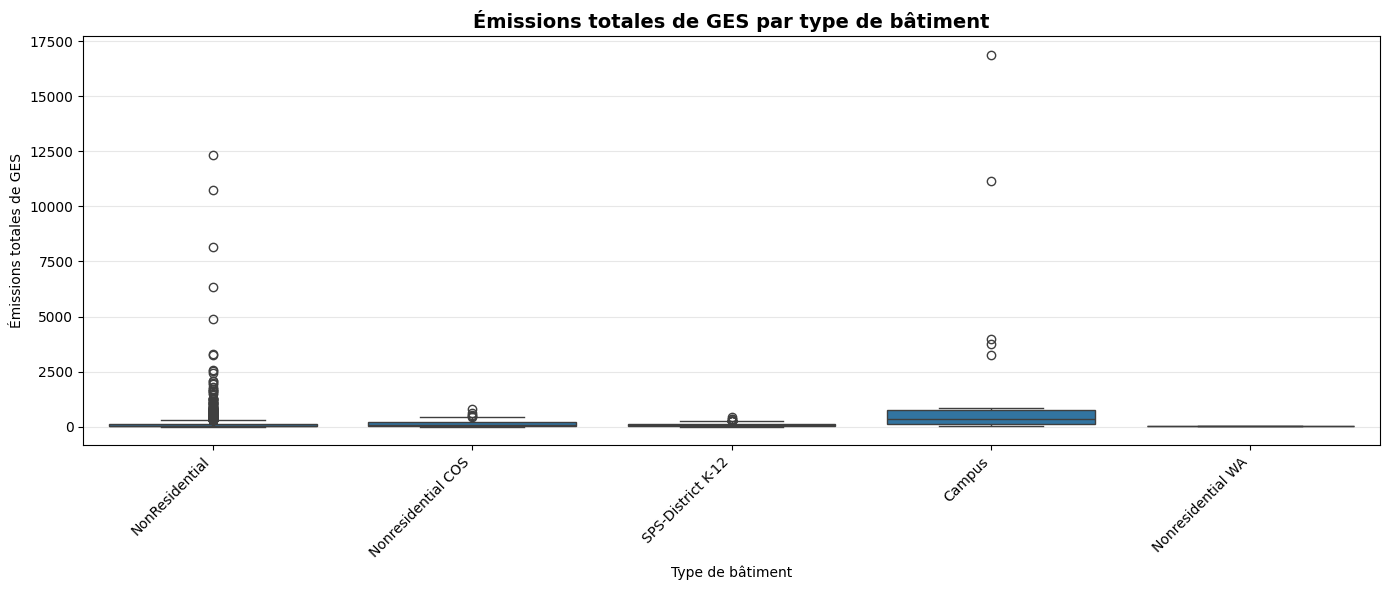

In [155]:
# Boxplot de TotalGHGEmissions par type de bâtiment (non-résidentiels)
plt.figure(figsize=(14, 6))
sns.boxplot(data=non_residential, x='BuildingType', y='TotalGHGEmissions')
plt.xticks(rotation=45, ha='right')
plt.title('Émissions totales de GES par type de bâtiment', fontsize=14, fontweight='bold')
plt.ylabel('Émissions totales de GES')
plt.xlabel('Type de bâtiment')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

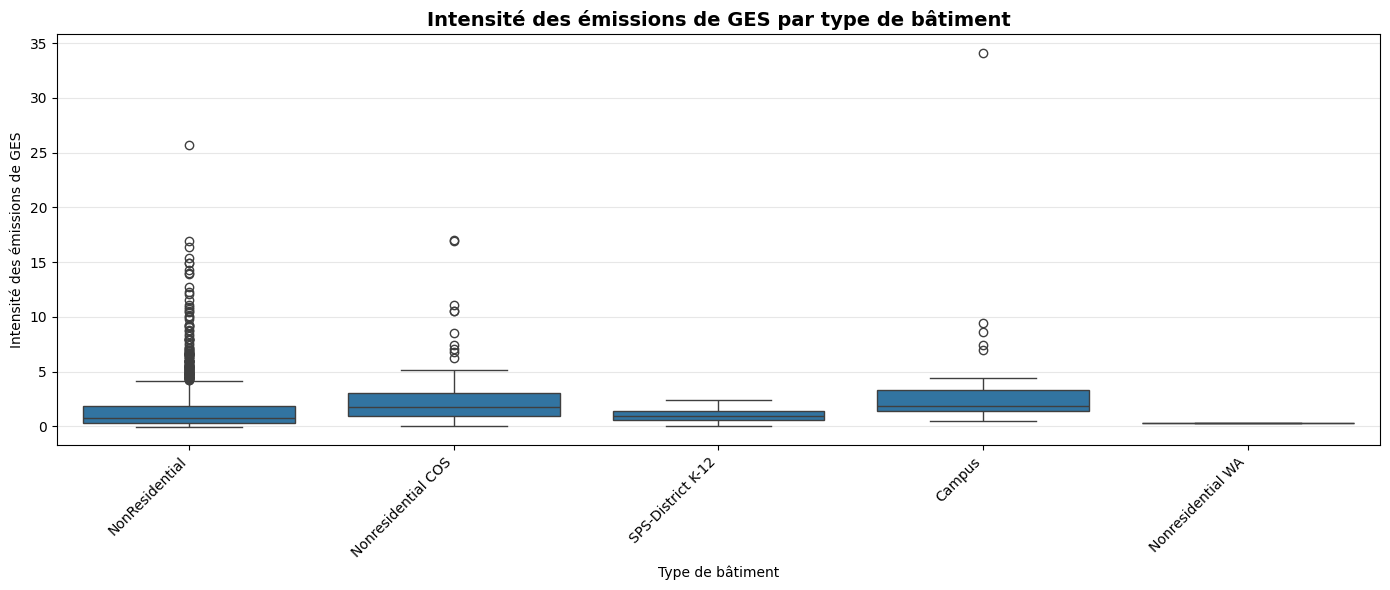

In [156]:
# Boxplot de GHGEmissionsIntensity par type de bâtiment (non-résidentiels)
plt.figure(figsize=(14, 6))
sns.boxplot(data=non_residential, x='BuildingType', y='GHGEmissionsIntensity')
plt.xticks(rotation=45, ha='right')
plt.title('Intensité des émissions de GES par type de bâtiment', fontsize=14, fontweight='bold')
plt.ylabel('Intensité des émissions de GES')
plt.xlabel('Type de bâtiment')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

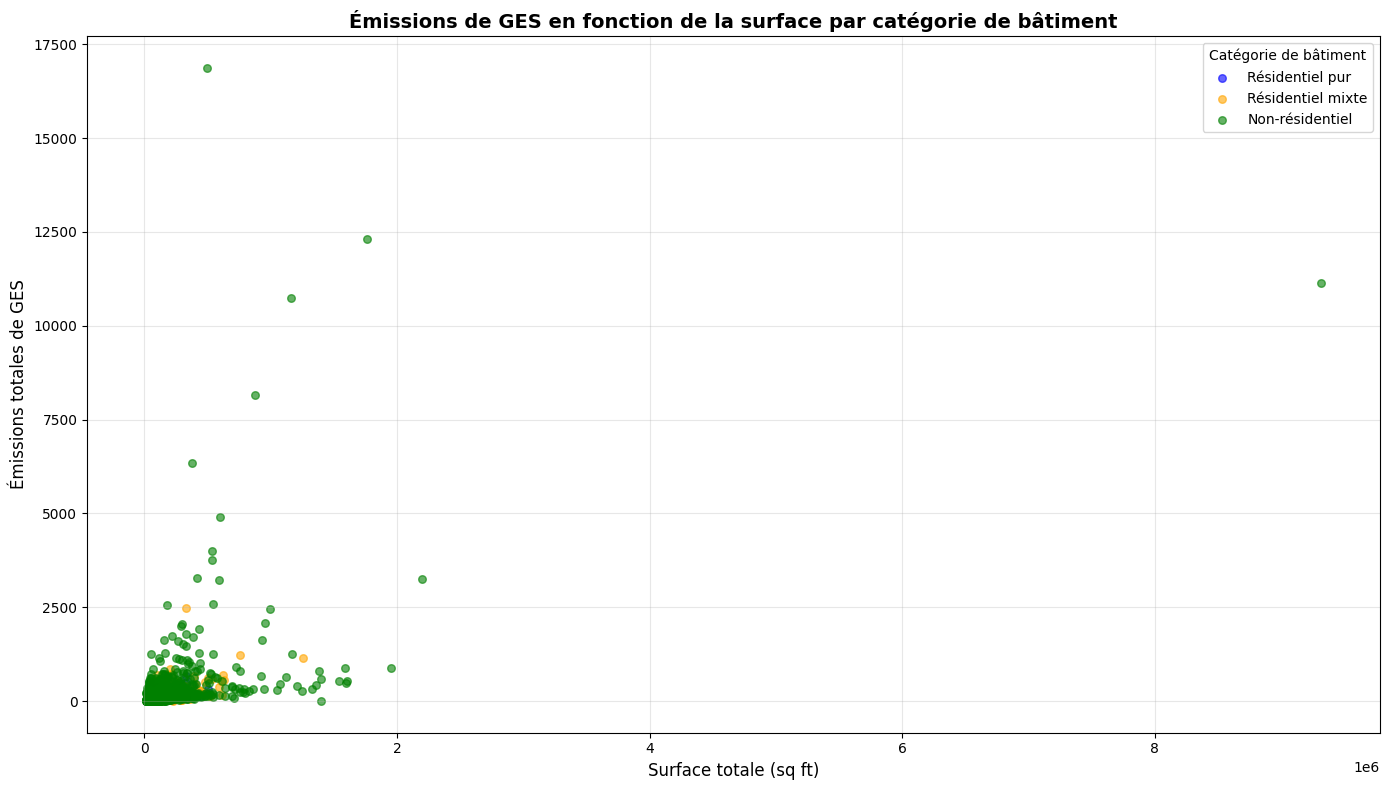

In [157]:
# Créer une colonne pour catégoriser les bâtiments en 3 groupes
def categorize_building(row):
    # Vérifier si c'est un Multifamily
    if 'Multifamily' in str(row['BuildingType']):
        # Vérifier si multi-usage (a un SecondLargestPropertyUseType)
        if pd.notna(row['SecondLargestPropertyUseType']):
            return 'Résidentiel mixte'
        else:
            return 'Résidentiel pur'
    else:
        return 'Non-résidentiel'

building_consumption['building_category'] = building_consumption.apply(categorize_building, axis=1)

# Scatter plot : Émissions vs Surface coloré par catégorie
plt.figure(figsize=(14, 8))
colors = {'Résidentiel pur': 'blue', 'Résidentiel mixte': 'orange', 'Non-résidentiel': 'green'}

for category, color in colors.items():
    data = building_consumption[building_consumption['building_category'] == category]
    plt.scatter(data['PropertyGFATotal'],
               data['TotalGHGEmissions'],
               alpha=0.6,
               s=30,
               c=color,
               label=category)

plt.xlabel('Surface totale (sq ft)', fontsize=12)
plt.ylabel('Émissions totales de GES', fontsize=12)
plt.title('Émissions de GES en fonction de la surface par catégorie de bâtiment', fontsize=14, fontweight='bold')
plt.legend(title='Catégorie de bâtiment', fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Les graphiques montrent bien que les potentielles catégories cibles sont écrasées par certains outliers, qui sont probablement insensé, et au pire inutile pour l'analyse

#### Analyse des outliers 

In [158]:
# Sachant qu'il y a de nombreux outliers, penchons nous sur les valeurs de la colonnes outliers

building_consumption['Outlier'].value_counts()

Outlier
Low outlier     23
High outlier     9
Name: count, dtype: int64

Il y a assez peu d'outliers, qui sont surement corrects car explicités dans le dataset, mais qui pourrait fausser nos analyses

#### Conclusion de l'analyse exploratrice

On peut conclure de cette analyse exploratrice plusieurs choses : 
1. Certaines colonnes ont énormément de valeurs manquantes mais ne sont pas pour autant inutiles. Nosu allons donc uniquement supprimer les colonnes comments (car totalement vide) et outliers (car cela fausserait notre recherche), et garder les autres en cas de potentiel utilisation future. 
2. Il en va de même pour les valeurs constantes. Nous allons supprimer DataYear, State et City, car nous savons déjà que l'analyse est basé sur la ville de Seattle dans l'état de Washington en 2016. Nous allons aussi supprimer la colonne DefaultData, car elle n'est pas expliqué dans la source et que nous ne pouvons pas l'analyser. 
3. Nous allons supprimer tout les outliers pour ne pas fausser nos recherches.
4. Nous allons supprimer tout les bâtiments ayant pour seul usage un usage destinés à l'habitation.
5. La valeur cible sera l'émission totale de gaz à effet de serre pour le moment.

# Modélisation 

### Import des modules 

In [159]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

#### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

##### Suppression des colonnes peu pertinentes

On va commencer par appliquer ce que j'ai dis dans la conclusion

In [ ]:
# Suppression des colonnes vides ou quasiment vides ainsi que des colonnes constantes ou quasi-constantes
columns_to_drop = ['Comments', 'Outlier', 'DataYear', 'State', 'City', 'DefaultData']
building_consumption.drop(columns=columns_to_drop, inplace=True)
building_consumption

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,is_multi_usage,building_category
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83,False,Non-résidentiel
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86,True,Non-résidentiel
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19,False,Non-résidentiel
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67,False,Non-résidentiel
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88,True,Non-résidentiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,1624049080,2,GREATER DUWAMISH,47.56722,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70,False,Non-résidentiel
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01,False,Non-résidentiel
3373,50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99,True,Non-résidentiel
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,7883603155,1,GREATER DUWAMISH,47.52832,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57,True,Non-résidentiel


On a maintenant plus que 42 colonnes

In [165]:
#Suppression des batîments d'habitations (Multifamily)
building_consumption = building_consumption[~building_consumption['BuildingType'].str.contains('Multifamily', na=False)]
building_consumption

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,is_multi_usage,building_category
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,Compliant,249.98,2.83,False,Non-résidentiel
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,Compliant,295.86,2.86,True,Non-résidentiel
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,Compliant,2089.28,2.19,False,Non-résidentiel
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,Compliant,286.43,4.67,False,Non-résidentiel
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,Compliant,505.01,2.88,True,Non-résidentiel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,1624049080,2,GREATER DUWAMISH,47.56722,...,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,Error - Correct Default Data,20.94,1.70,False,Non-résidentiel
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,...,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,Compliant,32.17,2.01,False,Non-résidentiel
3373,50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,...,0.00,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,Compliant,223.54,16.99,True,Non-résidentiel
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,7883603155,1,GREATER DUWAMISH,47.52832,...,0.00,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,Compliant,22.11,1.57,True,Non-résidentiel


On a maintenant plus que 1668 lignes

#### Gestion des outliers

In [161]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [162]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [163]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE